# Clustering (and PCA, t-SNE) using only healthy and ALZ. people
healthy: prmdiag = 0
Alzheimer: prmdiag = 2 or 3

# Import Libraries and setup

In [49]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


plt.style.use("ggplot")

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/Colab Notebooks/data_DELCODE')

Mounted at /content/drive


# Load and transform data

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [4]:
train.head()


,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,...,237_243,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,85,3fd91223d,14,63,18.05.2016,1,0,13,1.215577,1.0,85.0,0.749860,0.230923,-0.065474,0.412777,0.303270,0.341117,-0.027277,0.574057,0.290517,0.862302,0.479994,0.419541,0.089797,0.211377,-0.069165,0.243698,0.138934,0.203588,-0.128424,-0.142274,-0.097212,0.342343,-0.006937,0.953543,0.271842,-0.215807,-0.345942,0.288377,-0.002376,...,0.675390,0.641759,0.256006,0.161096,0.051992,0.335806,0.274249,0.464632,0.346927,0.197321,0.093035,0.169661,0.843718,0.758413,0.297913,0.398200,-0.033476,1.027731,1.040865,1.111977,0.796641,0.750172,0.242670,0.693493,0.663318,0.677533,0.545846,0.246136,0.600611,0.532708,0.910899,0.423027,0.168445,0.086235,0.553605,0.260301,0.262766,-0.064755,-0.121692,1.193451
1,11,0f1b4b7ac,11,68,26.10.2017,1,2,13,-0.583224,1.0,11.0,0.769255,0.488714,0.116482,-0.021402,-0.150269,0.307751,0.393959,0.304850,0.355440,0.476269,0.125607,-0.130721,-0.072421,0.430517,0.186178,0.727480,0.388229,0.120676,0.009006,0.496298,0.096529,0.357324,0.193164,0.485271,0.248289,-0.113434,-0.227484,0.485454,0.268980,...,1.170770,0.347485,0.377663,0.224154,0.323828,0.439175,0.538379,0.322498,0.745291,0.248104,0.554985,0.353254,0.220629,0.451341,0.322443,0.568902,0.357294,0.450699,0.659226,0.461063,0.722502,0.556016,0.228903,0.295915,0.322317,0.484691,0.791189,0.268268,0.141795,0.034816,0.381080,0.852528,0.141102,0.182648,0.196211,0.387882,0.299217,0.194711,0.191894,1.018621
2,619,bf5da3838,11,78,22.06.2016,0,1,14,-0.856116,1.0,619.0,0.168419,0.257018,0.016907,0.091702,-0.010532,0.435234,0.106881,0.182423,0.056001,0.502006,0.317397,0.217119,0.021138,0.640308,0.071841,0.204547,0.161851,0.247751,-0.140406,0.114880,-0.060171,0.269094,0.016566,0.430953,0.037941,0.160389,-0.093853,0.430277,-0.035102,...,0.709562,0.446627,0.172218,-0.172940,0.199733,0.216898,0.212193,0.245178,0.138725,0.192206,0.234587,0.136768,0.221140,0.219693,0.082570,0.190661,0.110283,0.411547,0.318120,0.673747,0.659346,0.442534,0.396549,0.123856,0.012965,0.577570,0.563080,0.140217,0.097882,-0.028234,0.639703,0.427146,0.088723,-0.245473,0.663036,0.142216,-0.300101,0.115183,-0.298258,0.131574
3,252,47e5a2600,2,63,28.11.2016,1,1,17,0.862633,0.0,252.0,0.868713,0.325486,0.395653,0.391204,0.349502,0.079478,0.199210,0.158742,-0.060597,0.801271,0.418965,0.180624,0.031938,0.310969,0.231340,0.663267,0.339705,0.427437,0.265302,0.042056,0.125814,0.487544,0.190261,0.516608,0.238371,0.118187,0.057087,0.064976,0.018432,...,0.695289,0.720458,0.383823,0.223196,0.268081,0.140685,0.303392,0.211814,0.215745,0.049197,0.347162,0.521063,0.218042,0.429776,0.175440,0.284785,-0.061578,0.478259,0.531669,0.544807,0.729218,0.118570,-0.128986,0.300403,0.406977,0.579221,0.414116,0.185960,0.494446,0.406204,0.331876,0.222091,0.354670,0.261393,0.797265,0.431262,0.195765,0.176242,-0.108549,0.525855
4,872,48387a07e,8,79,2015-08-31,1,3,11,-2.116266,1.0,872.0,0.128000,0.545008,-0.343972,0.862140,-0.015617,0.179164,-0.233017,0.034938,-0.105519,0.733050,0.088092,0.277305,-0.179329,0.332651,-0.231090,0.702441,-0.072943,0.645076,-0.215037,0.274248,-0.451468,0.574711,-0.173056,0.595247,-0.396143,0.378200,-0.196846,0.674376,-0.166660,...,0.301599,0.281604,-0.257081,0.164976,-0.064623,0.205962,0.259190,0.369864,0.119939,0.430113,-0.128200,0.036388,-0.062767,0.013018,0.002274,0.071944,0.069917,0.173637,0.107760,0.456734,0.444816,0.072618,0.086900,-0.095910,0.172357,0.220310,0.484933,0.004595,-0.263606,-0.013920,0.155383,0.416782,-0.300804,0.057657,0.031142,-0.086161,0.055487,-0.082463,-0.0298

In [5]:
test.head()

,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,...,237_243,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,868,6829e1ce3,10,71,2015-01-26,2,3,16,-1.729994,1.0,868.0,1.146729,0.522587,0.299638,0.549717,0.073312,0.446971,0.012572,0.603935,0.515467,0.932092,0.583021,0.171392,-0.144495,-0.024442,-0.154272,0.712633,0.251251,0.240397,-0.052765,0.386807,0.228755,0.298525,0.221253,1.410941,0.474349,0.086748,0.237207,0.782228,0.296881,...,0.351774,0.511471,0.285011,0.270964,0.300079,0.243370,0.258913,0.261387,0.046223,0.189416,0.380844,0.385093,0.527842,0.512310,0.552118,0.450334,0.314042,0.155607,0.164104,0.277321,0.763092,0.408995,0.353857,-0.039462,-0.050630,0.585805,0.494930,0.147964,0.142526,-0.063525,0.747366,0.400368,-0.087084,-0.167530,0.879731,-0.252925,-0.231639,-0.138693,-0.027045,0.388247
1,441,8522b0508,2,67,21.10.2014,1,0,16,1.158892,1.0,441.0,0.199663,0.610013,-0.066466,0.349376,0.076821,0.208840,-0.262101,0.251783,0.211163,0.502968,0.207629,0.394165,0.220473,0.123993,-0.243632,0.552812,0.049304,-0.000104,-0.295398,-0.166069,-0.178240,0.405269,0.093878,0.658632,-0.157273,-0.017449,-0.041605,0.469527,-0.155139,...,0.568286,0.587661,0.183287,0.223735,0.130710,0.166708,0.359447,0.452511,0.340619,0.426335,0.069407,0.105798,0.426328,0.282587,0.205381,0.334163,-0.105860,0.547087,0.732076,0.466669,0.774426,0.387074,0.279595,0.339490,0.642812,0.525380,0.845305,0.514832,0.259368,0.347379,0.496284,0.486426,0.242803,0.254150,0.619526,0.272887,0.358726,0.032463,0.061394,0.616225
2,344,278d3e09d,8,65,11.09.2017,0,2,13,-0.551006,1.0,344.0,0.725238,0.426898,0.360894,0.397894,0.256171,0.386240,0.287945,0.371946,0.271444,0.609089,0.498072,0.465709,0.396935,0.336638,0.446888,0.531004,0.389180,0.377135,0.363941,0.571994,0.364167,0.417144,0.246004,0.516343,0.338453,0.069048,0.216679,0.159632,0.384338,...,0.155720,0.567304,-0.004329,0.017256,0.063996,0.074868,0.256378,0.301886,0.180127,0.111256,-0.155415,-0.101298,0.141372,0.379444,-0.019284,0.072540,-0.186382,0.199278,0.417957,0.093033,0.441952,0.149979,0.208389,0.309599,0.440471,0.292920,0.381183,-0.173404,-0.034664,-0.018565,0.623140,0.499137,0.129084,0.047080,0.387393,-0.007641,0.035944,0.172719,0.116450,0.835336
3,739,e082ef075,10,73,19.10.2017,0,1,15,0.065046,0.0,739.0,0.869575,0.559593,0.257733,0.073006,0.082113,0.381939,0.371169,0.294993,0.386934,0.532553,0.449445,-0.205010,-0.239771,0.455469,0.453030,0.448847,0.264279,0.055732,0.076631,0.338998,0.139095,0.570759,0.290608,0.591161,0.232670,-0.378361,-0.021351,-0.019480,0.040730,...,0.739715,0.696475,0.096738,0.061929,0.030234,0.570444,0.710507,0.727654,0.669247,0.624993,0.029718,0.028448,0.388798,0.331263,0.181484,0.231469,-0.077557,0.505848,0.542434,0.554592,0.730163,0.717702,0.451304,0.104766,0.353524,0.938313,0.585477,0.233315,-0.033772,0.010233,0.736154,0.569162,-0.119822,-0.006025,0.557559,-0.116897,-0.013115,0.108947,0.054055,0.560809
4,788,f71815317,10,68,23.03.2015,1,0,18,0.746486,1.0,788.0,0.441515,0.386490,-0.026574,0.261981,0.058682,0.529303,0.489445,0.249773,0.230496,0.483261,0.222630,0.437510,0.109644,0.056770,-0.024151,0.468324,-0.045324,0.228089,0.026241,0.296034,0.027189,0.339351,0.031207,0.528243,0.138107,0.161225,-0.218060,0.422676,-0.077393,...,0.519957,0.316054,0.159369,0.163482,0.217169,0.311668,0.339225,0.221511,0.103218,0.326568,0.152667,0.141363,0.100861,0.176335,0.059848,0.209259,0.286097,0.011010,0.112836,0.234297,0.524877,0.097849,0.190229,0.045144,0.150050,-0.070643,0.338269,0.071217,-0.283862,-0.029804,0.250007,0.286963,0.099830,0.150341,0.217731,-0.076833,0.167448,0.222248,0.2066

In [6]:
data = pd.concat([train, test])

has_alzheimer = data.prmdiag.isin([2,3])
no_alzheimer = data.prmdiag.isin([0])

data.loc[has_alzheimer, 'target'] = 1
data.loc[no_alzheimer, 'target'] = 0
data.dropna(subset=['target'], axis = 0, inplace = True)

In [7]:
data['prmdiag'].value_counts()

0    218
2    155
3     97
Name: prmdiag, dtype: int64

In [8]:
data.head()

,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,...,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246,target
0,85,3fd91223d,14,63,18.05.2016,1,0,13,1.215577,1.0,85.0,0.749860,0.230923,-0.065474,0.412777,0.303270,0.341117,-0.027277,0.574057,0.290517,0.862302,0.479994,0.419541,0.089797,0.211377,-0.069165,0.243698,0.138934,0.203588,-0.128424,-0.142274,-0.097212,0.342343,-0.006937,0.953543,0.271842,-0.215807,-0.345942,0.288377,-0.002376,...,0.641759,0.256006,0.161096,0.051992,0.335806,0.274249,0.464632,0.346927,0.197321,0.093035,0.169661,0.843718,0.758413,0.297913,0.398200,-0.033476,1.027731,1.040865,1.111977,0.796641,0.750172,0.242670,0.693493,0.663318,0.677533,0.545846,0.246136,0.600611,0.532708,0.910899,0.423027,0.168445,0.086235,0.553605,0.260301,0.262766,-0.064755,-0.121692,1.193451,0.0
1,11,0f1b4b7ac,11,68,26.10.2017,1,2,13,-0.583224,1.0,11.0,0.769255,0.488714,0.116482,-0.021402,-0.150269,0.307751,0.393959,0.304850,0.355440,0.476269,0.125607,-0.130721,-0.072421,0.430517,0.186178,0.727480,0.388229,0.120676,0.009006,0.496298,0.096529,0.357324,0.193164,0.485271,0.248289,-0.113434,-0.227484,0.485454,0.268980,...,0.347485,0.377663,0.224154,0.323828,0.439175,0.538379,0.322498,0.745291,0.248104,0.554985,0.353254,0.220629,0.451341,0.322443,0.568902,0.357294,0.450699,0.659226,0.461063,0.722502,0.556016,0.228903,0.295915,0.322317,0.484691,0.791189,0.268268,0.141795,0.034816,0.381080,0.852528,0.141102,0.182648,0.196211,0.387882,0.299217,0.194711,0.191894,1.018621,1.0
4,872,48387a07e,8,79,2015-08-31,1,3,11,-2.116266,1.0,872.0,0.128000,0.545008,-0.343972,0.862140,-0.015617,0.179164,-0.233017,0.034938,-0.105519,0.733050,0.088092,0.277305,-0.179329,0.332651,-0.231090,0.702441,-0.072943,0.645076,-0.215037,0.274248,-0.451468,0.574711,-0.173056,0.595247,-0.396143,0.378200,-0.196846,0.674376,-0.166660,...,0.281604,-0.257081,0.164976,-0.064623,0.205962,0.259190,0.369864,0.119939,0.430113,-0.128200,0.036388,-0.062767,0.013018,0.002274,0.071944,0.069917,0.173637,0.107760,0.456734,0.444816,0.072618,0.086900,-0.095910,0.172357,0.220310,0.484933,0.004595,-0.263606,-0.013920,0.155383,0.416782,-0.300804,0.057657,0.031142,-0.086161,0.055487,-0.082463,-0.029868,0.177041,1.0
6,600,b7366d4e7,17,80,21.03.2016,0,2,20,0.015855,0.0,600.0,0.657332,0.347128,-0.167410,0.280710,-0.157041,0.467331,0.260995,0.517199,0.588520,0.737202,0.280181,0.036148,-0.433458,0.376787,-0.034786,0.552384,0.211489,0.189938,-0.309075,0.462604,0.074468,0.470414,-0.015360,0.557063,0.395350,0.199054,-0.230754,0.621687,0.200350,...,0.372624,0.382199,0.265894,0.317322,0.002251,0.068883,0.138541,0.245860,0.248097,0.404380,0.286435,0.496166,0.543058,0.274278,0.409860,0.361463,0.779966,0.883161,0.369491,0.562398,0.187109,0.398199,0.386231,0.464398,0.372927,0.425103,0.337273,0.214717,0.390517,0.442674,0.533545,0.323606,0.286532,0.711554,0.234731,0.236117,0.455528,0.319778,0.893984,1.0
7,119,5ca2bd986,10,63,30.03.2015,1,0,17,1.290290,1.0,119.0,0.632554,0.448096,-0.099636,0.148432,0.000507,0.376781,0.109158,0.340907,0.302944,0.129397,-0.168128,0.048191,-0.094942,0.733354,-0.157158,0.182389,-0.036345,0.188492,0.084848,0.032761,-0.332687,0.126210,-0.160153,0.168841,-0.023692,-0.041869,-0.026709,0.199110,-0.306778,...,0.375218,0.096060,0.027763,0.034913,0.053902,0.062457,0.117186,0.291245,0.092310,-0.262508,0.066890,0.122538,0.276765,0.072096,0.094201,-0.023628,0.723958,0.435232,0.239009,0.837527,0.618657,0.484254,0.133337,0.167602,0.282136,0.303759,0.300559,0.156599,-0.024033,0.489201,0.562503,-0.109381,0.076725,0.567872,-0.126060,-0.016570,-0.083890,0.072153,0.454525,0.0


In [9]:
dat_cluster = data.copy()
dat_cluster.drop(['ConnID','Repseudonym','siteid','age', 'visdat', 'sex', 'prmdiag', 'edyears', 'MEM_score', 'Apoe', 'IDs', 'target'], axis = 1, inplace=True)
dat_cluster.head()


,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,1_31,1_32,1_33,1_34,1_35,1_36,1_37,1_38,1_39,1_40,1_41,...,237_243,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,0.749860,0.230923,-0.065474,0.412777,0.303270,0.341117,-0.027277,0.574057,0.290517,0.862302,0.479994,0.419541,0.089797,0.211377,-0.069165,0.243698,0.138934,0.203588,-0.128424,-0.142274,-0.097212,0.342343,-0.006937,0.953543,0.271842,-0.215807,-0.345942,0.288377,-0.002376,0.105462,0.011338,0.225393,0.253414,0.241490,0.170374,0.454263,0.390002,0.608381,0.330585,0.297279,...,0.675390,0.641759,0.256006,0.161096,0.051992,0.335806,0.274249,0.464632,0.346927,0.197321,0.093035,0.169661,0.843718,0.758413,0.297913,0.398200,-0.033476,1.027731,1.040865,1.111977,0.796641,0.750172,0.242670,0.693493,0.663318,0.677533,0.545846,0.246136,0.600611,0.532708,0.910899,0.423027,0.168445,0.086235,0.553605,0.260301,0.262766,-0.064755,-0.121692,1.193451
1,0.769255,0.488714,0.116482,-0.021402,-0.150269,0.307751,0.393959,0.304850,0.355440,0.476269,0.125607,-0.130721,-0.072421,0.430517,0.186178,0.727480,0.388229,0.120676,0.009006,0.496298,0.096529,0.357324,0.193164,0.485271,0.248289,-0.113434,-0.227484,0.485454,0.268980,0.308087,0.194488,0.309779,0.124812,0.151790,-0.065100,0.646630,0.305655,0.520542,0.225370,0.040498,...,1.170770,0.347485,0.377663,0.224154,0.323828,0.439175,0.538379,0.322498,0.745291,0.248104,0.554985,0.353254,0.220629,0.451341,0.322443,0.568902,0.357294,0.450699,0.659226,0.461063,0.722502,0.556016,0.228903,0.295915,0.322317,0.484691,0.791189,0.268268,0.141795,0.034816,0.381080,0.852528,0.141102,0.182648,0.196211,0.387882,0.299217,0.194711,0.191894,1.018621
4,0.128000,0.545008,-0.343972,0.862140,-0.015617,0.179164,-0.233017,0.034938,-0.105519,0.733050,0.088092,0.277305,-0.179329,0.332651,-0.231090,0.702441,-0.072943,0.645076,-0.215037,0.274248,-0.451468,0.574711,-0.173056,0.595247,-0.396143,0.378200,-0.196846,0.674376,-0.166660,0.612536,-0.324272,0.939128,-0.014797,0.828764,-0.181847,0.353251,-0.151077,0.833930,-0.089481,-0.079434,...,0.301599,0.281604,-0.257081,0.164976,-0.064623,0.205962,0.259190,0.369864,0.119939,0.430113,-0.128200,0.036388,-0.062767,0.013018,0.002274,0.071944,0.069917,0.173637,0.107760,0.456734,0.444816,0.072618,0.086900,-0.095910,0.172357,0.220310,0.484933,0.004595,-0.263606,-0.013920,0.155383,0.416782,-0.300804,0.057657,0.031142,-0.086161,0.055487,-0.082463,-0.029868,0.177041
6,0.657332,0.347128,-0.167410,0.280710,-0.157041,0.467331,0.260995,0.517199,0.588520,0.737202,0.280181,0.036148,-0.433458,0.376787,-0.034786,0.552384,0.211489,0.189938,-0.309075,0.462604,0.074468,0.470414,-0.015360,0.557063,0.395350,0.199054,-0.230754,0.621687,0.200350,0.597928,0.388534,0.220472,0.291767,-0.018108,0.305950,0.693765,0.173834,0.130357,0.356320,0.128894,...,0.340671,0.372624,0.382199,0.265894,0.317322,0.002251,0.068883,0.138541,0.245860,0.248097,0.404380,0.286435,0.496166,0.543058,0.274278,0.409860,0.361463,0.779966,0.883161,0.369491,0.562398,0.187109,0.398199,0.386231,0.464398,0.372927,0.425103,0.337273,0.214717,0.390517,0.442674,0.533545,0.323606,0.286532,0.711554,0.234731,0.236117,0.455528,0.319778,0.893984
7,0.632554,0.448096,-0.099636,0.148432,0.000507,0.376781,0.109158,0.340907,0.302944,0.129397,-0.168128,0.048191,-0.094942,0.733354,-0.157158,0.182389,-0.036345,0.188492,0.084848,0.032761,-0.332687,0.126210,-0.160153,0.168841,-0.023692,-0.041869,-0.026709,0.199110,-0.306778,-0.132843,-0.260338,0.060599,0.032775,-0.234035,-0.037019,-0.006991,0.027361,0.423242,-0.067505,-0.276530,...,0.273598,0.375218,0.096060,0.027763,0.034913,0.053902,0.062457,0.117186,0.291245,0.092310,-0.262508,0.066890,0.122538,0.276765,0.072096,0

In [10]:
dat_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 178
Columns: 30135 entries, 1_2 to 245_246
dtypes: float64(30135)
memory usage: 108.1 MB


# Clustering - kMeans

In [11]:
cl_km = KMeans(n_clusters=2)
cl_km.fit(dat_cluster)

KMeans(n_clusters=2)

In [12]:
labelsKM = pd.Series(cl_km.labels_)
labelsKM.value_counts()

1    235
0    235
dtype: int64

In [13]:
data['target'].value_counts() # comparison: group sizes healthy (0) and alzheimer (1)

1.0    252
0.0    218
Name: target, dtype: int64

In [14]:
data['KM'] = labelsKM.tolist()
pd.crosstab(index=data['KM'], columns=data['target'])

target,0.0,1.0
KM,,
0,85,150
1,133,102


In [15]:
pd.crosstab(index=data['KM'], columns=data['target'], normalize = 'index')

target,0.0,1.0
KM,,
0,0.361702,0.638298
1,0.565957,0.434043


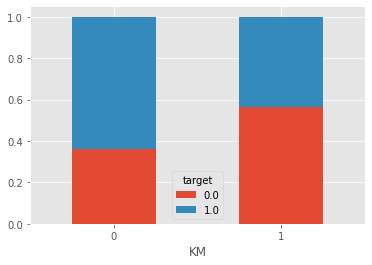

In [16]:
plot = pd.crosstab(index=data['KM'], columns=data['target'], normalize = 'index').plot(kind = 'bar', stacked = True, rot = 0)

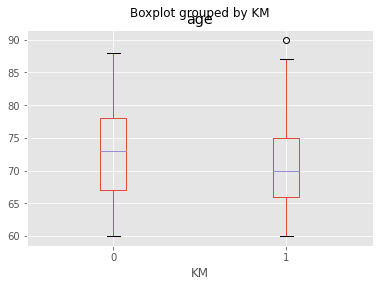

In [17]:
data.boxplot(column='age',by='KM')

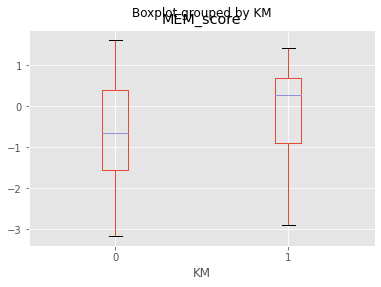

In [18]:
data.boxplot(column='MEM_score',by='KM')

# Clustering - Hierachical, ward

In [19]:
cl_w = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cl_w.fit(dat_cluster)

AgglomerativeClustering()

In [20]:
labelsWard = pd.Series(cl_w.labels_)
labelsWard.value_counts()

0    386
1     84
dtype: int64

In [21]:
data['ward'] = labelsWard.tolist()
pd.crosstab(index=data['ward'], columns=data['target'])

target,0.0,1.0
ward,,
0,177,209
1,41,43


In [22]:
pd.crosstab(index=data['ward'], columns=data['target'], normalize = 'index')

target,0.0,1.0
ward,,
0,0.458549,0.541451
1,0.488095,0.511905


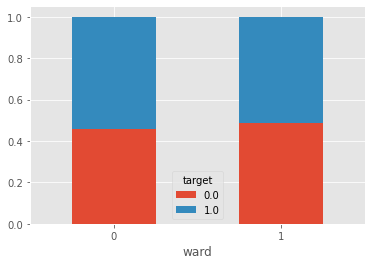

In [23]:
plot = pd.crosstab(index=data['ward'], columns=data['target'], normalize = 'index').plot(kind = 'bar', stacked = True, rot = 0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


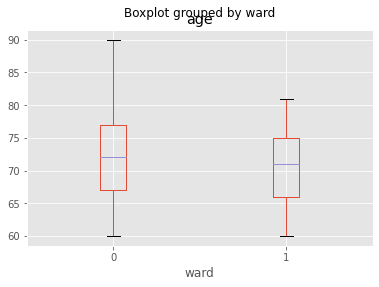

In [24]:
data.boxplot(column='age',by='ward')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


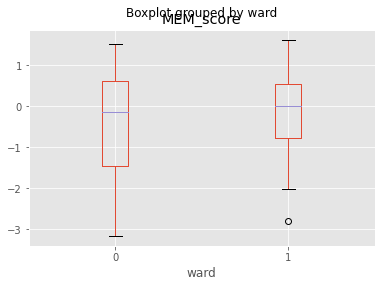

In [25]:
data.boxplot(column='MEM_score',by='ward')

# Clustering - Hierachical, average linkage

In [26]:
cl_ave = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cl_ave.fit(dat_cluster)

AgglomerativeClustering(linkage='average')

In [27]:
labelsAve = pd.Series(cl_ave.labels_)
labelsAve.value_counts()

0    469
1      1
dtype: int64

# PCA first, then clustering
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Results quite similar to normal KMeans

In [28]:
pca_100 = PCA(n_components=100, random_state=123) # random state: reproducible results if randomization is used
pca_100.fit(dat_cluster)

PCA(n_components=100, random_state=123)

In [29]:
dat_pca = pca_100.transform(dat_cluster)
dat_pca.shape

(470, 100)

In [30]:
cl_km_pca = KMeans(n_clusters=2)
cl_km_pca.fit(dat_pca)

KMeans(n_clusters=2)

In [31]:
labelsKM_pca = pd.Series(cl_km_pca.labels_)
labelsKM_pca.value_counts()

1    241
0    229
dtype: int64

In [32]:
data['KM_pca'] = labelsKM_pca.tolist()
pd.crosstab(index=data['KM_pca'], columns=data['target'])

target,0.0,1.0
KM_pca,,
0,81,148
1,137,104


In [33]:
pd.crosstab(index=data['KM_pca'], columns=data['target'], normalize = 'index') # very similar to normal k Means

target,0.0,1.0
KM_pca,,
0,0.353712,0.646288
1,0.568465,0.431535


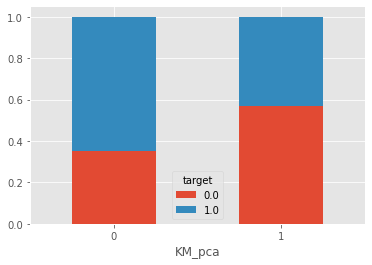

In [34]:
pd.crosstab(index=data['KM_pca'], columns=data['target'], normalize = 'index').plot(kind = 'bar', stacked = True, rot = 0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


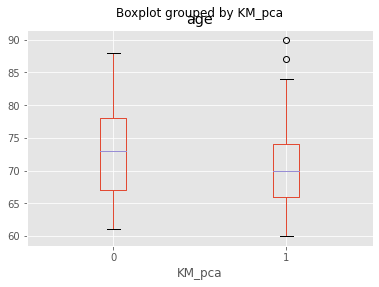

In [35]:
data.boxplot(column='age',by='KM_pca')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


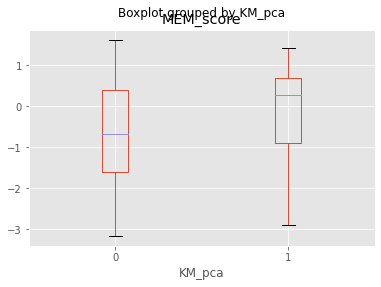

In [36]:
data.boxplot(column='MEM_score',by='KM_pca')

#  PCA visualisation

[0.04360132 0.03801912 0.02675731 0.02103484 0.01727035 0.01396124
 0.01279693 0.01161642 0.01105334 0.01055845 0.00938619 0.00875327
 0.00856531 0.00823441 0.00782686 0.00745088 0.00728022 0.00716748
 0.00668453 0.00646631 0.0064532  0.00611929 0.00589403 0.00575535
 0.00563465 0.00535051 0.00522899 0.00511609 0.00497343 0.00484791
 0.00472187 0.00454673 0.00447579 0.00439504 0.00431711 0.00422761
 0.00415428 0.00412015 0.00397915 0.00390281 0.00387773 0.00385738
 0.0037865  0.00367843 0.00363408 0.00359836 0.00355502 0.00351644
 0.00350082 0.00346263 0.00340157 0.0033813  0.00330704 0.00326518
 0.0032346  0.00318316 0.00316867 0.00314046 0.00307972 0.00303035
 0.00297105 0.00296007 0.00292863 0.00291457 0.00285369 0.00282234
 0.0028121  0.00279189 0.00277939 0.00274714 0.00273148 0.0027284
 0.00267483 0.00265504 0.0026197  0.00258301 0.00255834 0.00254012
 0.00251254 0.00249814 0.00245386 0.00243326 0.00241466 0.00239133
 0.00236194 0.00233503 0.00232902 0.00230197 0.00227806 0.00226

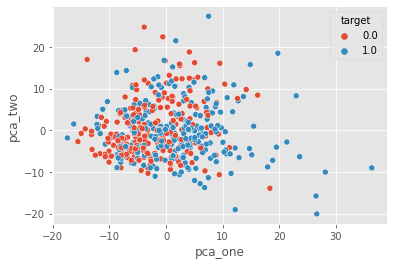

In [48]:
print(pca_100.explained_variance_ratio_)

data['pca_one'] = dat_pca[:, 0]
data['pca_two'] = dat_pca[:, 1]

sns.scatterplot(
    x = "pca_one", y = "pca_two",
    hue = "target",
    data = data
)


# t-SNE
On PCA results

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
("It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.")

In [50]:
tsne2 = TSNE(n_components=2, perplexity=100)
tsne2_results = tsne2.fit_transform(dat_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [54]:
tsne2_results.shape

(470, 2)

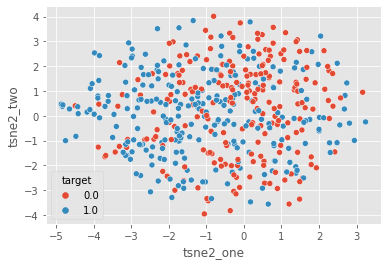

In [55]:
data['tsne2_one'] = tsne2_results[:, 0]
data['tsne2_two'] = tsne2_results[:, 1]

sns.scatterplot(
    x = "tsne2_one", y = "tsne2_two",
    hue = "target",
    data = data
)
